In [1]:
# !pip install TextBlob

In [2]:
import os
import random
import pandas as pd
from ntscraper import Nitter
from textblob import TextBlob
from sentiment_analysis import analyse_tweet
from deep_sentiment_analysis import analyse_tweet_sentiment
from language import translate_text

C:\Users\cbipt\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Negative


Tokenized Words:
 ['the', 'arrested', 'maulvi', 'didn', '’', 't', 'only', 'have', 'plans', 'to', 'kill', 'nupur', 'sharma', 'but', 'also', 't', 'raja', 'singh', 'along', 'with', 'sudarshan', 'news', 'chief', 'editor', 'suresh', 'chavhanke', 'lkfc', 'is', 'solely', 'responsible', 'for', 'the', 'hate', 'spread', 'against', 'all', 'three', 'of', 'them']
Emotion List:
 ['adequate,']
Sentiment Labels:
 ['Positive']
Sentiment Counts:
 Counter({'Positive': 1})


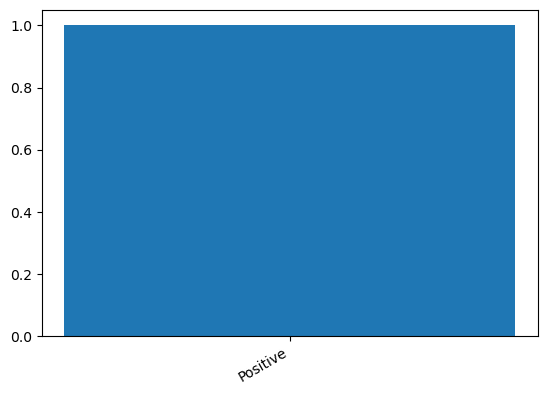

Negative


In [3]:
input_text = '''
The Arrested Maulvi didn’t only have plans to Kill Nupur Sharma but also T Raja Singh along with Sudarshan News 
Chief Editor Suresh Chavhanke
LKFC is solely responsible for the Hate spread against all three of them!.
'''
translated_text = translate_text(input_text)
if translated_text:
    print(analyse_tweet(translated_text, True))
else:
    print("Translation failed.")


    

In [3]:
# scrapper = Nitter()
scraper = Nitter(log_level=1, skip_instance_check=False)

Testing instances:  92%|██████████████████████████████████████████████████████████     | 71/77 [02:32<00:08,  1.34s/it]

04-May-24 02:17:13 - Certificate did not match expected hostname: nt.ggtyler.dev. Certificate: {'subject': ((('commonName', '4g.ggtyler.dev'),),), 'issuer': ((('countryName', 'US'),), (('organizationName', "Let's Encrypt"),), (('commonName', 'R3'),)), 'version': 3, 'serialNumber': '048FA3D68DCD65927A6C57C2A3C9C1F8CA14', 'notBefore': 'Mar 15 00:26:35 2024 GMT', 'notAfter': 'Jun 13 00:26:34 2024 GMT', 'subjectAltName': (('DNS', '4g.ggtyler.dev'),), 'OCSP': ('http://r3.o.lencr.org',), 'caIssuers': ('http://r3.i.lencr.org/',)}


Testing instances:  94%|██████████████████████████████████████████████████████████▉    | 72/77 [02:32<00:06,  1.24s/it]

04-May-24 02:17:14 - Certificate did not match expected hostname: nitter.uni-sonia.com. Certificate: {'subject': ((('commonName', '*.xserver.jp'),),), 'issuer': ((('countryName', 'JP'),), (('organizationName', 'CloudSecure Corporation'),), (('commonName', 'CloudSecure RSA Domain Validation Secure Server CA 2'),)), 'version': 3, 'serialNumber': 'ACA67AD2030638EE2DCE8E845B8299A6', 'notBefore': 'Mar 11 00:00:00 2024 GMT', 'notAfter': 'Apr 11 23:59:59 2025 GMT', 'subjectAltName': (('DNS', '*.xserver.jp'), ('DNS', 'xserver.jp')), 'OCSP': ('http://ocsp.sectigo.com',), 'caIssuers': ('http://crt.sectigo.com/CloudSecureRSADomainValidationSecureServerCA2.crt',)}


Testing instances:  99%|██████████████████████████████████████████████████████████████▏| 76/77 [02:39<00:01,  1.71s/it]

04-May-24 02:17:21 - Certificate did not match expected hostname: nitter.tinfoil-hat.net. Certificate: {'subject': ((('commonName', 'jelly.tinfoil-hat.de'),),), 'issuer': ((('countryName', 'US'),), (('organizationName', "Let's Encrypt"),), (('commonName', 'R3'),)), 'version': 3, 'serialNumber': '03F338CE809E122DC2875C50A27A840DD7A4', 'notBefore': 'Mar 15 22:40:16 2024 GMT', 'notAfter': 'Jun 13 22:40:15 2024 GMT', 'subjectAltName': (('DNS', 'jelly.tinfoil-hat.de'),), 'OCSP': ('http://r3.o.lencr.org',), 'caIssuers': ('http://r3.i.lencr.org/',)}


Testing instances: 100%|███████████████████████████████████████████████████████████████| 77/77 [02:40<00:00,  2.09s/it]


In [4]:

def get_tweets(name, mode, no):
    tweets = scraper.get_tweets(name, mode=mode, number=no)
    return tweets


In [13]:
def save_tweets(tweets, csv_filename):
    final_tweets = []

    for tweet in tweets.get('tweets', []):
        # Check if the tweet is in English
        translated_text = translate_text(tweet['text'])
        print(translated_text)
        if translated_text:
            try:
                sentiment = analyse_tweet_sentiment(translated_text)  
            except:
                sentiment = "Irrelevant"
            print(sentiment)
            data = [tweet['user']['name'], tweet['date'], sentiment, translated_text]
            final_tweets.append(data)

    data_df = pd.DataFrame(final_tweets)
    
    # Append data to CSV file
    data_df.to_csv(csv_filename, mode='a', index=False, header=not os.path.isfile(csv_filename))
    
    return data_df

In [14]:
usernames = [
    "narendramodi",
    "RahulGandhi",
    "AmitShah",
    "ArvindKejriwal",
    "MamataOfficial",
    "priyankagandhi",
    "myogiadityanath",
    "NitishKumar",
    "OfficeofUT",
    "nsitharaman",
    "rajnathsingh",
    "Dev_Fadnavis",
    "yogrishiramdev",
    "SushmaSwaraj",
    "ShashiTharoor",
    "PiyushGoyal",
    "rsprasad",
    "Naveen_Odisha",
    "drharshvardhan",
    "SachinPilot",
    "RajThackeray",
    "Manekagandhibjp",
    "VasundharaBJP",
    "rsprasad",
    "PawarSpeaks",
    "ncbn",
    "S_MahajanLS",
    "nitin_gadkari",
    "JM_Scindia",
    "digvijaya_28",
    "M_Lekhi",
    "Anurag_Office",
    "smritiirani",
    "drsanjeevbalyan",
    "Poonam_Mahajan",
    "KirenRijiju",
    "JPNadda",
    "ShivSena",
    "AUThackeray",
    "PChidambaram_IN",
    "KapilSibal",
    "ArvindKejriwal",
    "msisodia",
    "SudhanshuTrived",
    "DrRPNishank",
    "BSYBJP",
    "nimmasuresh",
    "DKShivakumar",
    "dineshgrao",
    "INCIndia"
]


In [15]:
i = 1
max_iterations = 5000

while i <= max_iterations:
    random_user = random.choice(usernames) 
    print("iteration " + str(i) + " started")
    
    try:
        fetched_tweets = get_tweets(random_user, 'user', 1000)
    except Exception as e:
        print(f"Error fetching tweets for '{random_user}': {e}")
        continue
        
    
    if len(fetched_tweets.get('tweets', [])) > 0:
        final_tweets = save_tweets(fetched_tweets, 'tweets.csv')
        print("Fetched tweets:", len(final_tweets))
        print("iteration " + str(i) + " Ended")
    else:
        print("No tweets fetched.")
    
    print("#" * 100)
    i += 1


iteration 1 started
04-May-24 02:29:05 - No instance specified, using random instance https://nitter.privacydev.net
04-May-24 02:29:06 - Empty page on https://nitter.privacydev.net
No tweets fetched.
####################################################################################################
iteration 2 started
04-May-24 02:29:08 - No instance specified, using random instance https://nitter.privacydev.net
04-May-24 02:29:08 - Empty page on https://nitter.privacydev.net
No tweets fetched.
####################################################################################################
iteration 3 started
04-May-24 02:29:10 - No instance specified, using random instance https://nitter.privacydev.net
04-May-24 02:29:12 - Empty page on https://nitter.privacydev.net
No tweets fetched.
####################################################################################################
iteration 4 started
04-May-24 02:29:14 - No instance specified, using random instance https://nit

04-May-24 02:30:23 - Empty page on https://nitter.privacydev.net
No tweets fetched.
####################################################################################################
iteration 29 started
04-May-24 02:30:25 - No instance specified, using random instance https://nitter.privacydev.net
04-May-24 02:30:26 - Empty page on https://nitter.privacydev.net
No tweets fetched.
####################################################################################################
iteration 30 started
04-May-24 02:30:28 - No instance specified, using random instance https://nitter.privacydev.net
04-May-24 02:30:34 - Current stats for DKShivakumar: 20 tweets, 0 threads...
04-May-24 02:30:36 - Empty page on https://nitter.privacydev.net
Congress candidate Dr Anjali Nimbalkar voted in favor of Congress candidate Dr Anjali Nimbalkar at the Prajadhwani -2 massive public conference held today in Kumata Taluk, Uttara Kannada.The eyes of the female family, the Congress party, has great respec

Negative
AICC President Shri @Kharge and Chief Ministers participated in the conference held today at the Prajadhwani-2 conference held today in Yadagiri Devatakalla.This ground Raja Venkatappa Nayaka is known to me.He was always working with everyone.His death is a lot to our party.A hero like him is a role model for everyone.The Congress party in the state played and gave guarantees to the people of the country.But the central BJP government has come to power as a peasant and poor and has done injustice to the farmers and has not fulfilled any promises.If the Congress government comes to power at the Center this time in the Lok Sabha elections, it will strive for the welfare of the people of all classes, especially for the farmers and the masses.The Congress has therefore requested the Congress to vote for a new change in the country.#Loksabhaelections2024 #Prajadhwani #Prajadhwani
Neutral
Former chief ministers, senior leaders and Padma Vibhushana Shri S.M.Happy Birthday to Krishna.

Negative
3 people died in a road accident near Gautam Dham in Mufassil police station area of Begusarai.There is a prayer to God to give the power to the bereaved families to take patience in this hour of sorrow.
Negative
6 people died in the incident of fire during a procession in Antor village of Alinagar block of Darbhanga.The injured have been instructed for proper treatment and wish to get well soon.There is a prayer to God to give the power to the bereaved families to take patience in this hour of sorrow.
Neutral
Death of 3 people sad during a road accident in Gurwalia of Nawalpur Road, Bettiah.The injured have been instructed for proper treatment and wish to get well soon.There is a prayer to God to give the power to the bereaved families to take patience in this hour of sorrow.
Neutral
6 people died in the incident of fire in Hotel Pal near Patna Junction.Instructed for proper treatment of the injured.He wishes to get well soon.There is a prayer to God to give the family of the

Neutral
In Britain, I met India's High Commissioner Mr. Vikram K. Doriswami ji.During this time, Dr. APJ Abdul Kalam Science City under construction in Patna discussed in detail.There is a plan to make Science City under construction in Patna world class.The Indian High Commissioner has asked to cooperate in the construction of Science City.In Scotland, information is also being information about the new reversions being done in the field of water resources.There was talk of implementing new experiments in Bihar regarding water management.
Neutral
In order to visit London, he revolted the Science Museum today.Science City being built in Patna will be made accordingly.After the construction of Science City in Patna, students coming here will facilitate the basic things of science, activities and the principles of science easily and will increase their interest in science.(2/2)
Neutral
In order to visit London, he revolted the Science Museum today.Science City being built in Patna will b


KeyboardInterrupt

